In [1]:
#Load the required libraries

import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Ark/0_ANALYSIS/DA_projects/transaction_data/transaction_data.csv")

## EDA

In [3]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [5]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:>

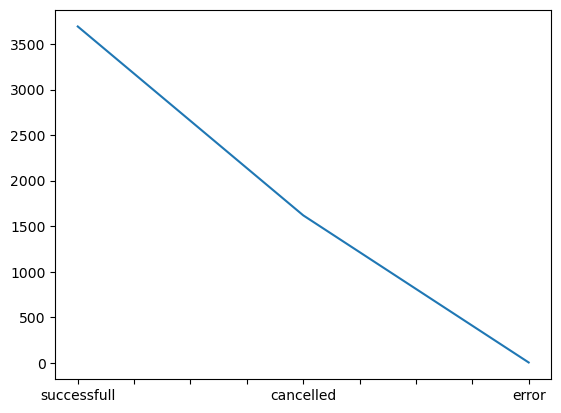

In [6]:
df.transaction.value_counts().plot()

In [9]:
successfull_transaction = df\
    .query('transaction == "successfull"')\
    .groupby(["name"], as_index=False)\
    .agg({"transaction":"count"})
    

successfull_transaction.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [10]:
# New dataframe

In [11]:
ndf = pd.read_csv("C:/Users/Ark/0_ANALYSIS/DA_projects/transaction_data/transaction_data_updated.csv")

In [17]:
ndf.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [29]:
# Transaction number
trans_number = ndf\
    .groupby(['name', 'minute'], as_index=False)\
    .agg({"transaction":"count"})
    

trans_number.head()

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


<AxesSubplot:xlabel='minute', ylabel='transaction'>

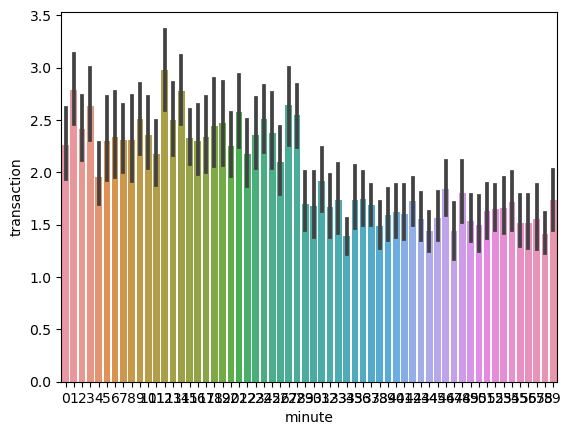

In [32]:
sns.barplot(data = trans_number, x = "minute", y = "transaction")

In [42]:
# There is a mistake in the representation of minutes. I have a minute column but do not have an hour column.
# I am going to transform time from hours and minutes in the "date" column into total minutes.

In [43]:
ndf.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [39]:
ndf['date'] = pd.to_datetime(ndf['date'])

In [45]:
ndf["total_minutes"] = ndf.date.dt.hour*60 + ndf.date.dt.minute

In [46]:
ndf

,date,name,transaction,minute,total_minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [48]:
# Transaction number
trans_number_new = ndf\
    .groupby(['name', 'total_minutes'], as_index=False)\
    .agg({"transaction":"count"})
    

trans_number_new.head()

,name,total_minutes,transaction
0,Ekaterina_Fedorova,0,1
1,Ekaterina_Fedorova,1,1
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,2
4,Ekaterina_Fedorova,4,2


<AxesSubplot:xlabel='total_minutes', ylabel='transaction'>

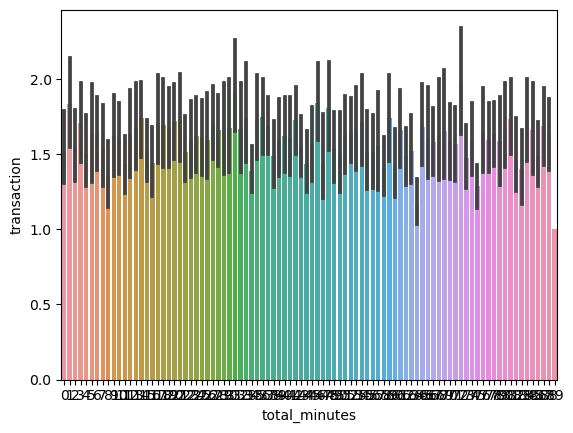

In [49]:
sns.barplot(data = trans_number_new, x = "total_minutes", y = "transaction")

In [ ]:
# Now it looks more suitable.